# Session 5: Optimization

You need to read the theory lectures before practicing with this notebook:
- [Preclass S5](https://hackmd.io/@KylePaul/ML_Preclass_S5)
- [Slide](https://hackmd.io/@KylePaul/ML_Slide_S5)

```{contents}

```

# MNIST Fashion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random

def reset_random_seeds(CUR_SEED=42):
   os.environ['PYTHONHASHSEED']=str(CUR_SEED)
   tf.random.set_seed(CUR_SEED)
   np.random.seed(CUR_SEED)
   random.seed(CUR_SEED)

reset_random_seeds()

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print('Shape of x_train:',x_train.shape)
print('Shape of y_train:',y_train.shape)
print('-'*10)
print('Shape of x_test:',x_test.shape)
print('Shape of y_test:',y_test.shape)
print('-'*10)
print('Labels:',np.unique(y_train))

4422102/4422102 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
----------
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)
----------
Labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

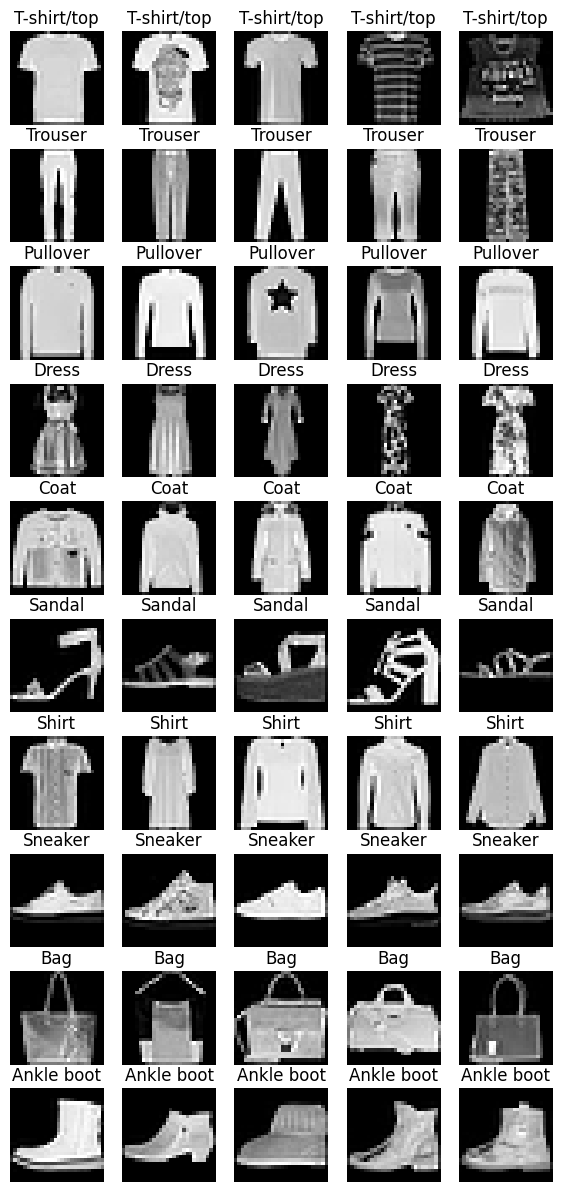

In [ ]:
rows = 10
cols = 5
_, axs = plt.subplots(nrows=rows,ncols=cols, figsize=(7,15))
for row in range(rows):
  for col in range(cols):
    random_index = np.random.choice(np.where(y_train == row)[0])
    axs[row][col].grid('off')
    axs[row][col].axis('off')
    axs[row][col].imshow(x_train[random_index], cmap='gray')
    axs[row][col].set_title(labels[y_train[random_index]])

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train_encode = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_encode = tf.keras.utils.to_categorical(y_test, num_classes=10)

## SGD vs Adam vs AdamW

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation, Input, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, AdamW
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

import math
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def plot(history, chart_title):
  epochs = np.arange(len(history.history["loss"]))

  train_loss = px.line(x=epochs, y=history.history["loss"]).data[0]
  train_loss["name"] = "Train Loss"
  train_loss["showlegend"] = True

  val_loss = px.line(x=epochs, y=history.history["val_loss"]).data[0]
  val_loss["line"]["color"] = "#00ff00"
  val_loss["name"] = "Val Loss"
  val_loss["showlegend"] = True

  train_accuracy = px.line(x=epochs, y=history.history["accuracy"]).data[0]
  train_accuracy["line"]["dash"] = "dot"
  train_accuracy["name"] = "Train Accuracy"
  train_accuracy["showlegend"] = True

  val_accuracy = px.line(x=epochs, y=history.history["val_accuracy"]).data[0]
  val_accuracy["line"]["color"] = "#00ff00"
  val_accuracy["line"]["dash"] = "dot"
  val_accuracy["name"] = "Val Accuracy"
  val_accuracy["showlegend"] = True

  fig = go.Figure(data=[train_loss, val_loss, train_accuracy, val_accuracy])
  fig.update_layout(
      title = chart_title,
      xaxis_title = "Epoch",
      yaxis_title = "Value"
  )
  fig.show()

In [ ]:
def train_model(optimizer):
  tf.keras.backend.clear_session()
  reset_random_seeds()

  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
  model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
  model.add(Dense(10, activation="softmax"))

  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')
  history = model.fit(x_train, y_train_encode, batch_size=256, epochs=30, validation_data=(x_test, y_test_encode))
  return history

In [ ]:
sgd_history = train_model(SGD())
plot(sgd_history, chart_title="SGD: Loss vs Accuracy")

Epoch 1/30
235/235 [==============================] - 8s 8ms/step - loss: 1.0971 - accuracy: 0.6600 - val_loss: 0.7683 - val_accuracy: 0.7489
Epoch 2/30
235/235 [==============================] - 2s 7ms/step - loss: 0.6783 - accuracy: 0.7828 - val_loss: 0.6418 - val_accuracy: 0.7930
Epoch 3/30
235/235 [==============================] - 1s 6ms/step - loss: 0.5895 - accuracy: 0.8085 - val_loss: 0.5884 - val_accuracy: 0.8031
Epoch 4/30
235/235 [==============================] - 2s 7ms/step - loss: 0.5428 - accuracy: 0.8214 - val_loss: 0.5602 - val_accuracy: 0.8060
Epoch 5/30
235/235 [==============================] - 2s 8ms/step - loss: 0.5134 - accuracy: 0.8290 - val_loss: 0.5359 - val_accuracy: 0.8162
Epoch 6/30
235/235 [==============================] - 2s 7ms/step - loss: 0.4927 - accuracy: 0.8336 - val_loss: 0.5209 - val_accuracy: 0.8176
Epoch 7/30
235/235 [==============================] - 2s 7ms/step - loss: 0.4768 - accuracy: 0.8390 - val_loss: 0.5183 - val_accuracy: 0.8168
Epoch 

In [ ]:
adam_history = train_model(Adam())
plot(adam_history, chart_title="Adam: Loss vs Accuracy")

Epoch 1/30
235/235 [==============================] - 3s 5ms/step - loss: 0.5012 - accuracy: 0.8256 - val_loss: 0.4252 - val_accuracy: 0.8469
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3556 - accuracy: 0.8710 - val_loss: 0.3724 - val_accuracy: 0.8643
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3141 - accuracy: 0.8853 - val_loss: 0.3499 - val_accuracy: 0.8727
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2920 - accuracy: 0.8910 - val_loss: 0.3573 - val_accuracy: 0.8687
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2699 - accuracy: 0.8989 - val_loss: 0.3400 - val_accuracy: 0.8744
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2551 - accuracy: 0.9045 - val_loss: 0.3337 - val_accuracy: 0.8781
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2394 - accuracy: 0.9113 - val_loss: 0.3405 - val_accuracy: 0.8798
Epoch 

In [ ]:
AdamW_history = train_model(AdamW())
plot(AdamW_history, chart_title="AdamW: Loss vs Accuracy")

Epoch 1/30
235/235 [==============================] - 2s 5ms/step - loss: 0.5018 - accuracy: 0.8246 - val_loss: 0.4186 - val_accuracy: 0.8504
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.3568 - accuracy: 0.8704 - val_loss: 0.3711 - val_accuracy: 0.8641
Epoch 3/30
235/235 [==============================] - 1s 6ms/step - loss: 0.3147 - accuracy: 0.8845 - val_loss: 0.3461 - val_accuracy: 0.8760
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2946 - accuracy: 0.8905 - val_loss: 0.3626 - val_accuracy: 0.8670
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2724 - accuracy: 0.8978 - val_loss: 0.3460 - val_accuracy: 0.8740
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2558 - accuracy: 0.9038 - val_loss: 0.3397 - val_accuracy: 0.8770
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2412 - accuracy: 0.9099 - val_loss: 0.3450 - val_accuracy: 0.8772
Epoch 

The direction of validation_loss is tend to increase $→$ the sign of overfitting. So we should create more data (augmentation) to enhance the model's generalization. Otherwise, we should apply some heuristics such as L2 Regularization

## L2 regularization

In [ ]:
tf.keras.backend.clear_session()
reset_random_seeds()

l2_reg = l2(0.0001)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Dense(512, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=AdamW(), loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train_encode, batch_size=256, epochs=30, validation_data=(x_test, y_test_encode))

plot(history, chart_title="AdamW & L2: Loss vs Accuracy")

Epoch 1/30
235/235 [==============================] - 3s 6ms/step - loss: 0.6798 - accuracy: 0.8251 - val_loss: 0.5844 - val_accuracy: 0.8484
Epoch 2/30
235/235 [==============================] - 1s 6ms/step - loss: 0.5096 - accuracy: 0.8688 - val_loss: 0.5127 - val_accuracy: 0.8636
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.4551 - accuracy: 0.8815 - val_loss: 0.4830 - val_accuracy: 0.8693
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.4233 - accuracy: 0.8870 - val_loss: 0.4915 - val_accuracy: 0.8598
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3963 - accuracy: 0.8950 - val_loss: 0.4586 - val_accuracy: 0.8708
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3782 - accuracy: 0.8973 - val_loss: 0.4405 - val_accuracy: 0.8800
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.3590 - accuracy: 0.9036 - val_loss: 0.4570 - val_accuracy: 0.8685
Epoch 

## Learning Rate Scheduler

In [ ]:
def lr_exp_decay(epoch):
    k = 0.1
    # initial_lr == global variable
    if epoch > 8:
      return initial_lr * math.exp(-k*epoch)
    else:
      return initial_lr

tf.keras.backend.clear_session()
reset_random_seeds()

l2_reg = l2(0.0001)
initial_lr = 0.001
lr_schedule = LearningRateScheduler(lr_exp_decay, verbose=1)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Dense(512, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=AdamW(learning_rate=initial_lr), loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(
    x_train, y_train_encode,
    batch_size=256,
    epochs=30,
    validation_data=(x_test, y_test_encode),
    callbacks=[lr_schedule])

plot(history, chart_title="AdamW & L2 & LR-Scheduler: Loss vs Accuracy")


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/30
235/235 [==============================] - 2s 5ms/step - loss: 0.6799 - accuracy: 0.8251 - val_loss: 0.5847 - val_accuracy: 0.8473 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 0.5102 - accuracy: 0.8687 - val_loss: 0.5166 - val_accuracy: 0.8635 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 0.4551 - accuracy: 0.8816 - val_loss: 0.4854 - val_accuracy: 0.8690 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 0.4240 - accuracy: 0.8868 - val_loss: 0.4854 - val_accuracy: 0.8615 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/30
235/235 [==============================] - 1s 4ms

## Batch Normalization

In [ ]:
def lr_exp_decay(epoch):
    k = 0.1
    # initial_lr == global variable
    if epoch > 8:
      return initial_lr * math.exp(-k*epoch)
    else:
      return initial_lr

tf.keras.backend.clear_session()
reset_random_seeds()

l2_reg = l2(0.0002)
initial_lr = 0.001
lr_schedule = LearningRateScheduler(lr_exp_decay, verbose=1)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, kernel_initializer="he_normal", kernel_regularizer=l2_reg, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(512, kernel_initializer="he_normal", kernel_regularizer=l2_reg, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=AdamW(learning_rate=initial_lr), loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(
    x_train, y_train_encode,
    batch_size=256,
    epochs=30,
    validation_data=(x_test, y_test_encode),
    callbacks=[lr_schedule])

plot(history, chart_title="AdamW & L2 & LR-Scheduler & BatchNorm: Loss vs Accuracy")


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/30
235/235 [==============================] - 4s 6ms/step - loss: 0.7956 - accuracy: 0.8484 - val_loss: 0.7580 - val_accuracy: 0.8413 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.6071 - accuracy: 0.8847 - val_loss: 0.6695 - val_accuracy: 0.8493 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/30
235/235 [==============================] - 1s 6ms/step - loss: 0.5163 - accuracy: 0.8963 - val_loss: 0.6268 - val_accuracy: 0.8527 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.4538 - accuracy: 0.9025 - val_loss: 0.5601 - val_accuracy: 0.8632 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/30
235/235 [==============================] - 1s 6ms

## Error Analysis

313/313 [==============================] - 1s 2ms/step


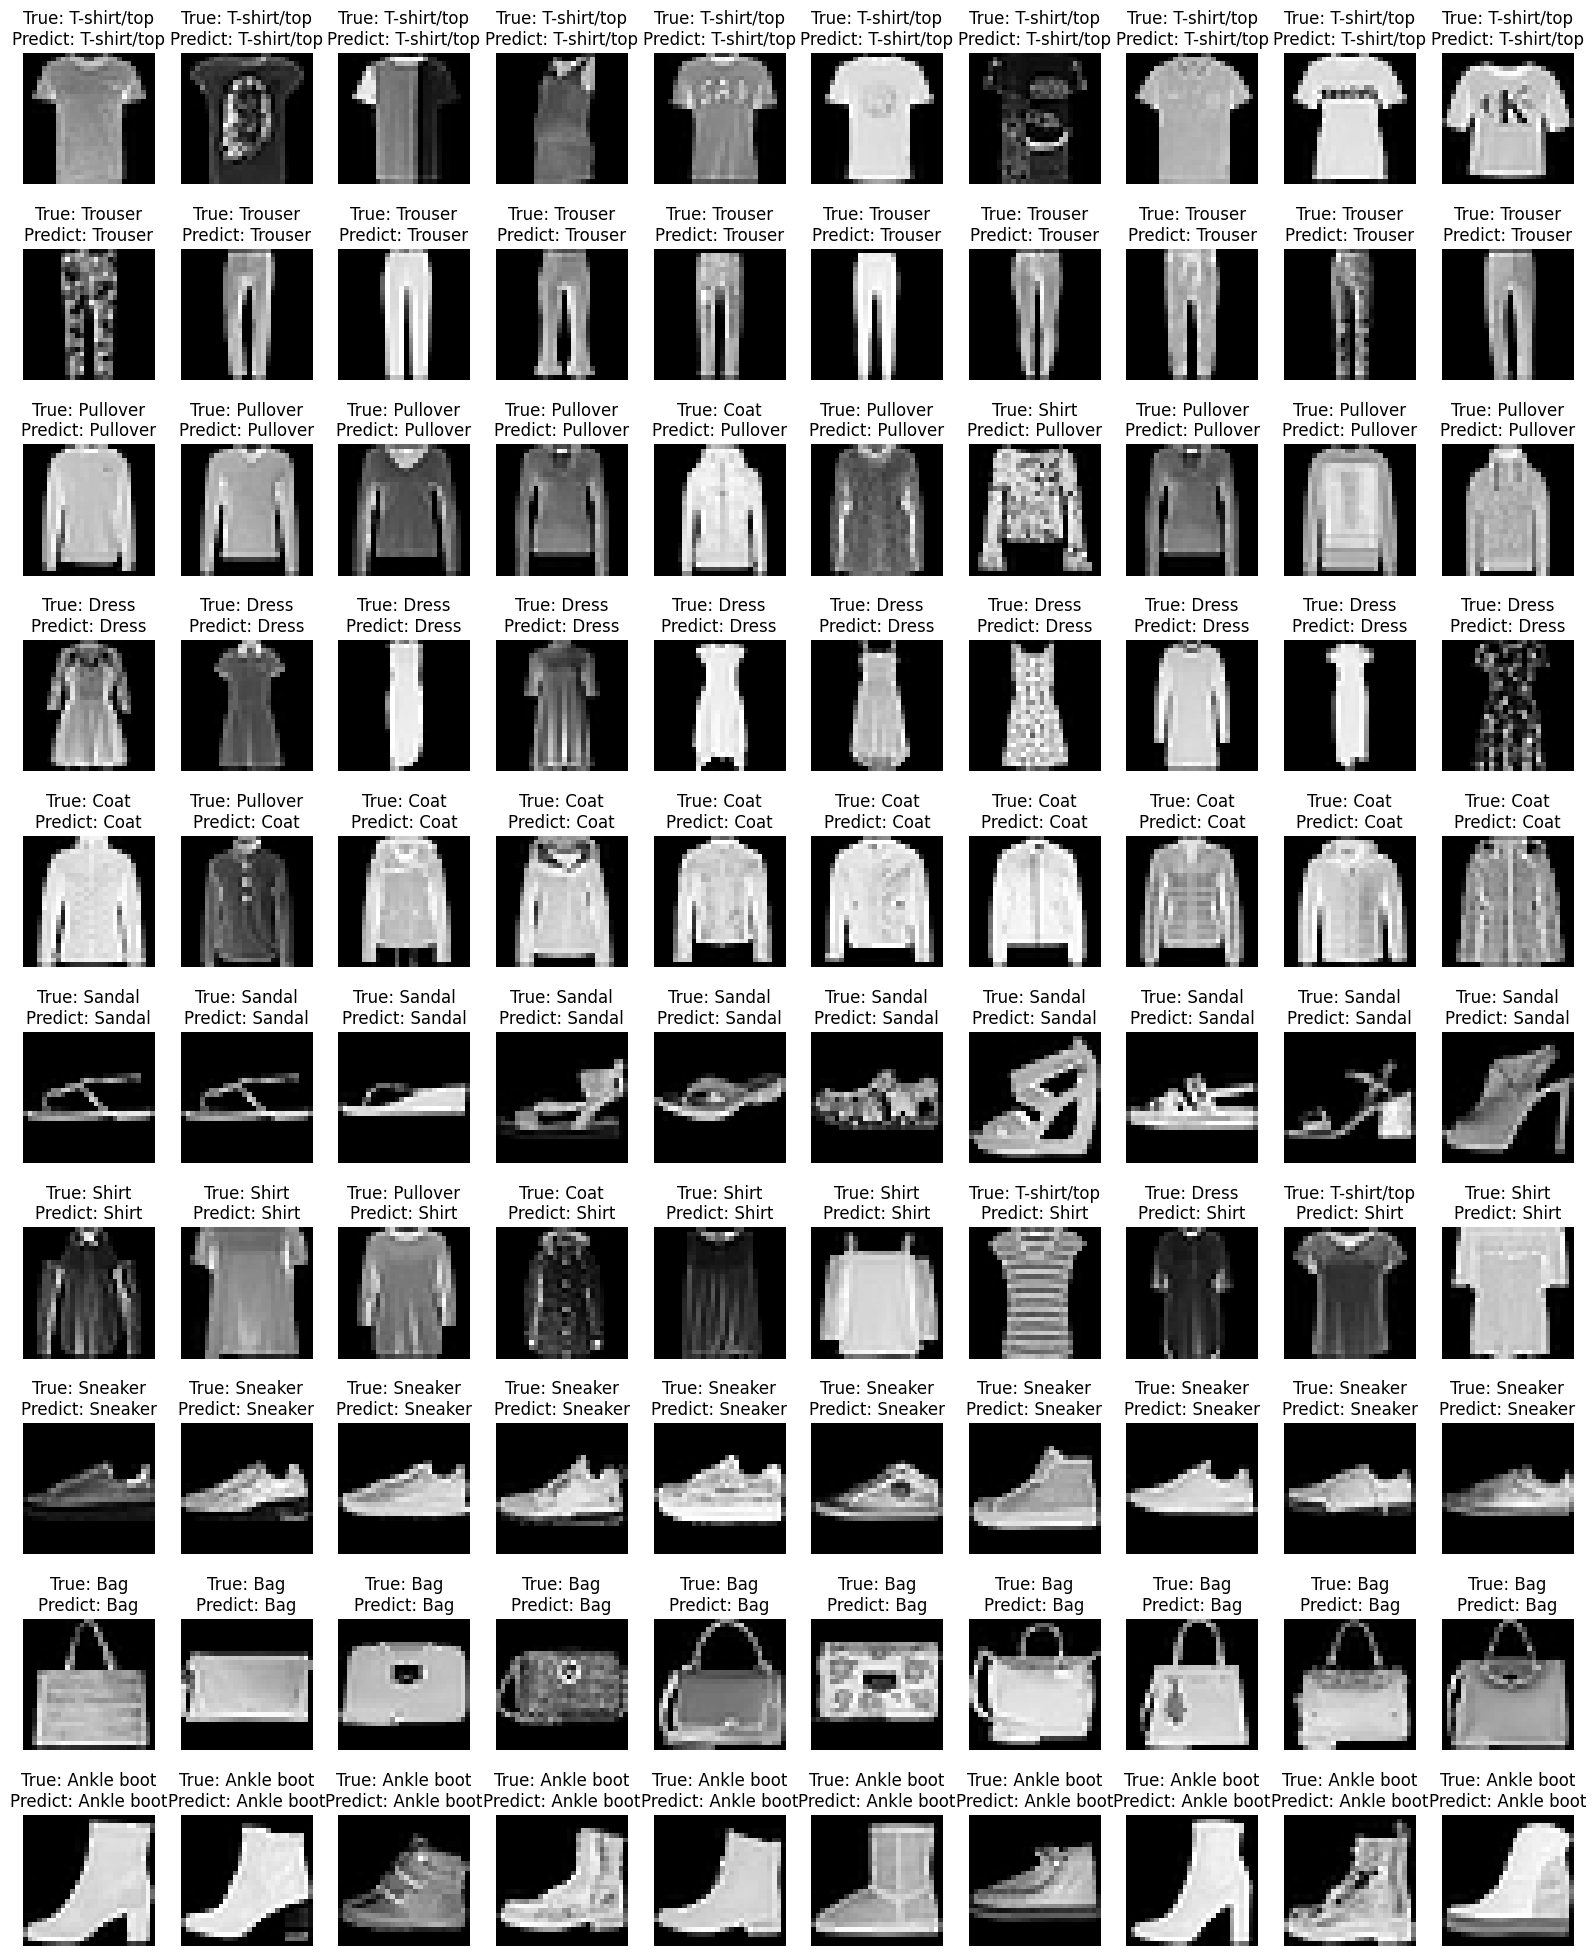

In [ ]:
y_test_pred_prob = model.predict(x_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
np.random.seed(0)

fig, axs = plt.subplots(10, 10, figsize=(20,25))
for row in range(10):
  for col in range(10):
    random_index = np.random.choice(np.where(y_test_pred == row)[0])
    axs[row][col].grid('off')
    axs[row][col].axis('off')
    axs[row][col].imshow(x_test[random_index], cmap='gray')

    ax_name = 'True: {}\nPredict: {}'.format(labels[y_test[random_index]], labels[y_test_pred[random_index]])
    axs[row][col].set_title(ax_name)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=labels))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.79      0.86      0.82      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.85      0.82      0.83      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.80      0.68      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

